<a href="https://colab.research.google.com/github/francismmiranda/Publicos/blob/main/Dados_FLU_ANA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.patheffects as pe
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from google.colab import files
  
#uploaded = files.upload()

In [43]:
chuva = pd.read_csv('chuvas_C_02346159.csv',sep=';',encoding='latin-1',error_bad_lines=False,skiprows=12,index_col=False) #lendo csv
chuva

,EstacaoCodigo,NivelConsistencia,Data,TipoMedicaoChuvas,Maxima,Total,DiaMaxima,NumDiasDeChuva,MaximaStatus,TotalStatus,NumDiasDeChuvaStatus,TotalAnual,TotalAnualStatus,Chuva01,Chuva02,Chuva03,Chuva04,Chuva05,Chuva06,Chuva07,Chuva08,Chuva09,Chuva10,Chuva11,Chuva12,Chuva13,Chuva14,Chuva15,Chuva16,Chuva17,Chuva18,Chuva19,Chuva20,Chuva21,Chuva22,Chuva23,Chuva24,Chuva25,Chuva26,Chuva27,Chuva28,Chuva29,Chuva30,Chuva31,Chuva01Status,Chuva02Status,Chuva03Status,Chuva04Status,Chuva05Status,Chuva06Status,Chuva07Status,Chuva08Status,Chuva09Status,Chuva10Status,Chuva11Status,Chuva12Status,Chuva13Status,Chuva14Status,Chuva15Status,Chuva16Status,Chuva17Status,Chuva18Status,Chuva19Status,Chuva20Status,Chuva21Status,Chuva22Status,Chuva23Status,Chuva24Status,Chuva25Status,Chuva26Status,Chuva27Status,Chuva28Status,Chuva29Status,Chuva30Status,Chuva31Status
0,2346159,1,01/06/1978,1,"49,2","59,1",8.0,18.0,1,1,0,NaN,0,"0,7","0,0","0,0","0,4","0,0","0,0","0,9","49,2","3,3","1,5","0,2","0,2","0,0","0,0","0,0","0,2","0,2","0,2","0,0","0,7","0,4","0,2","0,2","0,2","0,2","0,2","0,0","0,0","0,0","0,0",NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,2346159,1,01/05/1978,1,"26,2","115,2",16.0,20.0,1,1,0,NaN,0,"14,4","2,2","0,2","0,0","0,6","0,0","3,2","1,8","0,6","0,4","0,2","0,0","0,0","0,0","4,4","26,2","25,0","3,8","0,4","23,6","5,8","1,0","0,4","0,6","0,0","0,4","0,0","0,0","0,0","0,0","0,0",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2346159,1,01/04/1978,1,"37,6","83,4",1.0,18.0,1,1,0,NaN,0,"37,6","4,4","0,0","0,2","0,0","0,0","0,6","0,0","0,0","13,0","2,2","0,0","0,2","0,0","0,4","0,0","0,0","0,0","3,6","5,8","0,4","2,4","0,6","8,0","1,2","0,0","0,2","0,0","0,4","2,2",NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
3,2346159,1,01/03/1978,1,"59,0","363,8",9.0,20.0,1,1,0,NaN,0,"21,0","1,6","27,8","50,0","39,0","51,4","26,6","50,8","59,0","4,4","1,2","0,0","0,2","0,0","0,2","0,0","0,0","0,0","0,0","0,0","0,6","0,0","0,0","0,2","0,0","0,0","2,8","1,6","21,0","3,8","0,6",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2346159,1,01/02/1978,1,"63,6","238,2",6.0,21.0,1,1,0,NaN,0,"0,0","0,0","0,0","42,2","52,0","63,6","4,4","0,8","2,0","0,0","0,0","0,0","1,0","0,4","0,2","18,0","0,6","13,8","0,4","0,2","34,0","1,8","0,6","1,2","0,6","0,2","0,0","0,2",NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2346159,1,01/11/1937,1,"38,0","335,2",2.0,21.0,1,1,0,NaN,0,"0,8","38,0","22,0","1,6","0,0","32,0","5,6","23,0","5,0","1,8","24,0","20,0","12,8","0,0","32,2","32,0","35,0","20,0","11,4","0,8","0,0","0,0","14,0","1,6","1,6","0,0","0,0","0,0","0,0","0,0",NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
488,2346159,1,01/10/1937,1,"49,0","255,0",19.0,24.0,1,1,0,NaN,0,"6,8","1,0","7,8","9,2","11,2","5,8","0,4","20,6","0,6","5,2","6,4","7,2","0,0","16,0","11,4","5,2","0,0","23,0","49,0","5,8","10,0","2,2","0,0","0,0","0,6","29,0","0,0","0,0","0,0","16,6","4,0",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
489,2346159,1,01/09/1937,1,"23,0","37,4",3.0,8.0,1,1,0,NaN,0,"0,0","0,6","23,0","0,8","0,0","0,0","0,0","0,0","0,0","1,4","0,0","0,0","0,0","0,4","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,8","0,0","0,0","0,0","0,0","6,8","3,6",NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
490,2346159,1,01/08/1937,1,"17,2","107,1",11.0,15.0,1,1,0,NaN,0,"0,0","0,0","0,0","0,0","6,4","0,0","0,0","0,0","0,0","12,2","17,2","0,6","0,6","0,0","0,0","0,0","0,0","0,0","0,0","0,0","13,1","17,2","11,0","11,6","3,0","2,0","1,0","7,6","0,0","0,6","3,0",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [44]:
chuva['Data']=pd.to_datetime(chuva.Data,format='%d/%m/%Y') #passando a coluna data para o formato dia-mês-ano
chuva=chuva.set_index('Data') #definindo a coluna Data como índice
chuva=chuva.loc[:, chuva.columns.isin(['NivelConsistencia','Chuva01', 'Chuva02', 'Chuva03','Chuva04','Chuva05','Chuva06','Chuva07','Chuva08','Chuva09','Chuva10'
,'Chuva11','Chuva12','Chuva13','Chuva14','Chuva15','Chuva16', 'Chuva17', 'Chuva18','Chuva19','Chuva20','Chuva21','Chuva22','Chuva23','Chuva24','Chuva25'
,'Chuva26','Chuva27','Chuva28','Chuva29','Chuva30','Chuva31'])] #recortando somente o índice, o nível de consistência e as chuvas diárias


In [45]:
chuva=chuva.sort_values(by=['Data'],ascending=True)

In [46]:
#Definindo quantos níveis de consistência existem
NC=chuva.groupby(by=['NivelConsistencia']).count()
NC
chuva['NivelConsistencia'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [47]:
chuva=chuva.reset_index()
chuva = chuva.melt(id_vars=['Data','NivelConsistencia'],
                     value_name ='Precipitação (mm)',var_name ='dia do mês')

In [48]:
chuva.info()
chuva=chuva.drop('NivelConsistencia',axis=1)
chuva

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15252 entries, 0 to 15251
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data               15252 non-null  datetime64[ns]
 1   NivelConsistencia  15252 non-null  int64         
 2   dia do mês         15252 non-null  object        
 3   Precipitação (mm)  14941 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 476.8+ KB


,Data,dia do mês,Precipitação (mm)
0,1937-07-01,Chuva01,"0,6"
1,1937-08-01,Chuva01,"0,0"
2,1937-09-01,Chuva01,"0,0"
3,1937-10-01,Chuva01,"6,8"
4,1937-11-01,Chuva01,"0,8"
...,...,...,...
15247,1978-02-01,Chuva31,NaN
15248,1978-03-01,Chuva31,"0,6"
15249,1978-04-01,Chuva31,NaN
15250,1978-05-01,Chuva31,"0,0"


In [49]:
chuva=chuva.set_index('Data') #definindo a coluna Data como índice
chuva=chuva.apply(lambda x: x.str.replace(',','.')) #substituindo vírgula por ponto
chuva=chuva.drop('dia do mês',axis=1) #removendo a coluna 'dia do mês'
chuva
chuva.to_csv('testechuva.csv')

In [50]:
chuva['Precipitação (mm)']=chuva['Precipitação (mm)'].astype(float)
#chuva=chuva.groupby(by=[chuva.index.year]).mean()
chuva = chuva.groupby([lambda x: x.year, lambda x: x.month]).sum()

In [51]:
chuva=chuva.to_records()

In [52]:
chuva=pd.DataFrame(chuva)

In [53]:
chuva=chuva.rename(columns = {'level_0': 'Ano', 'level_1': 'Meses'})

In [54]:
chuva=pd.pivot_table(chuva,values='Precipitação (mm)',columns='Ano',index=['Meses'])

In [55]:
chuva

Ano,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978
Meses,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,254.6,268.4,393.2,226.2,237.6,295.9,307.8,210.2,255.4,524.6,222.7,523.3,439.7,259.0,197.7,170.1,193.8,357.4,126.8,240.8,230.0,405.8,189.2,392.2,370.8,242.0,126.4,363.2,477.0,344.0,272.4,188.6,370.2,411.9,276.0,458.6,260.6,505.0,655.0,429.6,360.8
2,NaN,477.8,153.0,261.4,284.8,635.6,117.2,711.2,330.5,141.6,507.5,77.8,262.3,262.2,381.5,293.1,360.3,223.4,126.8,326.0,266.8,108.4,507.2,479.6,499.2,334.2,384.4,199.8,278.6,136.4,472.8,130.0,257.4,466.4,493.4,176.0,304.6,81.6,537.8,267.2,27.0,238.2
3,NaN,365.9,246.0,288.6,411.8,246.3,74.8,326.6,423.9,417.8,261.4,329.8,185.9,401.2,181.1,286.9,167.1,250.3,170.2,575.2,266.6,400.6,297.2,87.8,352.6,315.4,203.6,273.8,235.2,427.6,385.2,374.8,387.0,353.4,269.6,227.4,211.2,231.2,214.0,278.4,143.2,363.8
4,NaN,240.6,230.4,184.0,126.2,230.6,80.6,240.6,177.0,94.2,121.4,153.3,141.0,287.6,125.2,55.8,246.9,321.4,143.2,205.9,192.8,271.1,71.8,223.8,156.2,187.6,56.6,184.2,387.4,456.2,254.4,0.0,199.6,114.3,163.2,211.4,361.8,185.4,108.4,307.2,273.6,83.4
5,NaN,115.4,91.6,91.8,127.2,48.6,113.8,119.2,110.0,70.2,186.3,330.6,68.4,76.6,62.0,250.8,191.8,158.6,78.4,147.8,89.2,237.0,118.2,165.6,88.2,80.8,98.4,141.0,183.0,103.2,58.6,14.8,97.0,85.2,84.0,78.8,175.4,53.4,106.8,226.0,135.2,115.2
6,NaN,224.8,50.8,45.8,47.8,129.4,118.5,52.5,202.6,130.2,185.4,33.2,216.5,44.3,32.4,169.7,36.1,59.7,81.0,191.4,68.6,82.8,22.8,72.4,89.6,48.4,84.6,100.0,45.8,46.4,133.2,48.4,82.8,65.0,140.4,12.6,71.8,159.8,61.4,91.8,56.6,59.1
7,40.4,88.2,150.2,45.0,113.6,139.2,38.0,78.0,88.6,58.6,141.3,139.3,72.8,35.4,58.8,29.1,187.4,51.8,74.4,79.0,134.6,13.6,42.8,176.2,71.2,110.4,49.0,74.2,143.0,65.2,86.6,74.2,43.6,50.6,57.6,66.0,136.6,24.8,99.6,162.2,17.8,NaN
8,107.1,250.4,69.6,53.2,79.0,64.2,180.8,40.6,47.6,48.6,177.2,108.8,109.7,31.2,84.3,82.2,165.0,79.0,106.8,114.2,127.8,59.0,170.4,130.2,30.6,69.2,56.4,87.8,21.0,126.0,28.2,211.0,84.4,183.4,161.0,140.6,98.0,29.4,48.0,160.2,111.2,NaN
9,37.4,198.6,138.8,161.2,192.0,79.6,136.0,81.2,213.3,119.8,246.6,120.0,174.1,155.3,86.3,170.6,100.4,108.3,128.0,102.4,282.0,153.6,145.0,95.6,129.4,179.0,44.4,159.8,161.2,223.4,202.6,118.2,94.4,123.6,117.6,272.8,197.4,140.6,133.0,247.2,213.2,NaN


In [56]:
chuva['média']=chuva.mean(axis=1)
chuva

Ano,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,média
Meses,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,254.6,268.4,393.2,226.2,237.6,295.9,307.8,210.2,255.4,524.6,222.7,523.3,439.7,259.0,197.7,170.1,193.8,357.4,126.8,240.8,230.0,405.8,189.2,392.2,370.8,242.0,126.4,363.2,477.0,344.0,272.4,188.6,370.2,411.9,276.0,458.6,260.6,505.0,655.0,429.6,360.8,317.914634
2,NaN,477.8,153.0,261.4,284.8,635.6,117.2,711.2,330.5,141.6,507.5,77.8,262.3,262.2,381.5,293.1,360.3,223.4,126.8,326.0,266.8,108.4,507.2,479.6,499.2,334.2,384.4,199.8,278.6,136.4,472.8,130.0,257.4,466.4,493.4,176.0,304.6,81.6,537.8,267.2,27.0,238.2,306.853659
3,NaN,365.9,246.0,288.6,411.8,246.3,74.8,326.6,423.9,417.8,261.4,329.8,185.9,401.2,181.1,286.9,167.1,250.3,170.2,575.2,266.6,400.6,297.2,87.8,352.6,315.4,203.6,273.8,235.2,427.6,385.2,374.8,387.0,353.4,269.6,227.4,211.2,231.2,214.0,278.4,143.2,363.8,290.497561
4,NaN,240.6,230.4,184.0,126.2,230.6,80.6,240.6,177.0,94.2,121.4,153.3,141.0,287.6,125.2,55.8,246.9,321.4,143.2,205.9,192.8,271.1,71.8,223.8,156.2,187.6,56.6,184.2,387.4,456.2,254.4,0.0,199.6,114.3,163.2,211.4,361.8,185.4,108.4,307.2,273.6,83.4,191.617073
5,NaN,115.4,91.6,91.8,127.2,48.6,113.8,119.2,110.0,70.2,186.3,330.6,68.4,76.6,62.0,250.8,191.8,158.6,78.4,147.8,89.2,237.0,118.2,165.6,88.2,80.8,98.4,141.0,183.0,103.2,58.6,14.8,97.0,85.2,84.0,78.8,175.4,53.4,106.8,226.0,135.2,115.2,121.319512
6,NaN,224.8,50.8,45.8,47.8,129.4,118.5,52.5,202.6,130.2,185.4,33.2,216.5,44.3,32.4,169.7,36.1,59.7,81.0,191.4,68.6,82.8,22.8,72.4,89.6,48.4,84.6,100.0,45.8,46.4,133.2,48.4,82.8,65.0,140.4,12.6,71.8,159.8,61.4,91.8,56.6,59.1,90.156098
7,40.4,88.2,150.2,45.0,113.6,139.2,38.0,78.0,88.6,58.6,141.3,139.3,72.8,35.4,58.8,29.1,187.4,51.8,74.4,79.0,134.6,13.6,42.8,176.2,71.2,110.4,49.0,74.2,143.0,65.2,86.6,74.2,43.6,50.6,57.6,66.0,136.6,24.8,99.6,162.2,17.8,NaN,83.143902
8,107.1,250.4,69.6,53.2,79.0,64.2,180.8,40.6,47.6,48.6,177.2,108.8,109.7,31.2,84.3,82.2,165.0,79.0,106.8,114.2,127.8,59.0,170.4,130.2,30.6,69.2,56.4,87.8,21.0,126.0,28.2,211.0,84.4,183.4,161.0,140.6,98.0,29.4,48.0,160.2,111.2,NaN,100.812195
9,37.4,198.6,138.8,161.2,192.0,79.6,136.0,81.2,213.3,119.8,246.6,120.0,174.1,155.3,86.3,170.6,100.4,108.3,128.0,102.4,282.0,153.6,145.0,95.6,129.4,179.0,44.4,159.8,161.2,223.4,202.6,118.2,94.4,123.6,117.6,272.8,197.4,140.6,133.0,247.2,213.2,NaN,150.826829


In [57]:
val=[]
k=chuva['média'].mean()
k

def f(row):
    if row['média'] > k:
        val ='Período Chuvoso'
    else:
        val ='Período Seco'
    return val

chuva['Periodo'] = chuva.apply(f, axis=1)


In [58]:
chuva['Meses']=['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']

chuva=chuva.drop('média',axis=1)


In [59]:
chuva

Ano,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,Periodo,Meses
Meses,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,254.6,268.4,393.2,226.2,237.6,295.9,307.8,210.2,255.4,524.6,222.7,523.3,439.7,259.0,197.7,170.1,193.8,357.4,126.8,240.8,230.0,405.8,189.2,392.2,370.8,242.0,126.4,363.2,477.0,344.0,272.4,188.6,370.2,411.9,276.0,458.6,260.6,505.0,655.0,429.6,360.8,Período Chuvoso,jan
2,NaN,477.8,153.0,261.4,284.8,635.6,117.2,711.2,330.5,141.6,507.5,77.8,262.3,262.2,381.5,293.1,360.3,223.4,126.8,326.0,266.8,108.4,507.2,479.6,499.2,334.2,384.4,199.8,278.6,136.4,472.8,130.0,257.4,466.4,493.4,176.0,304.6,81.6,537.8,267.2,27.0,238.2,Período Chuvoso,fev
3,NaN,365.9,246.0,288.6,411.8,246.3,74.8,326.6,423.9,417.8,261.4,329.8,185.9,401.2,181.1,286.9,167.1,250.3,170.2,575.2,266.6,400.6,297.2,87.8,352.6,315.4,203.6,273.8,235.2,427.6,385.2,374.8,387.0,353.4,269.6,227.4,211.2,231.2,214.0,278.4,143.2,363.8,Período Chuvoso,mar
4,NaN,240.6,230.4,184.0,126.2,230.6,80.6,240.6,177.0,94.2,121.4,153.3,141.0,287.6,125.2,55.8,246.9,321.4,143.2,205.9,192.8,271.1,71.8,223.8,156.2,187.6,56.6,184.2,387.4,456.2,254.4,0.0,199.6,114.3,163.2,211.4,361.8,185.4,108.4,307.2,273.6,83.4,Período Seco,abr
5,NaN,115.4,91.6,91.8,127.2,48.6,113.8,119.2,110.0,70.2,186.3,330.6,68.4,76.6,62.0,250.8,191.8,158.6,78.4,147.8,89.2,237.0,118.2,165.6,88.2,80.8,98.4,141.0,183.0,103.2,58.6,14.8,97.0,85.2,84.0,78.8,175.4,53.4,106.8,226.0,135.2,115.2,Período Seco,mai
6,NaN,224.8,50.8,45.8,47.8,129.4,118.5,52.5,202.6,130.2,185.4,33.2,216.5,44.3,32.4,169.7,36.1,59.7,81.0,191.4,68.6,82.8,22.8,72.4,89.6,48.4,84.6,100.0,45.8,46.4,133.2,48.4,82.8,65.0,140.4,12.6,71.8,159.8,61.4,91.8,56.6,59.1,Período Seco,jun
7,40.4,88.2,150.2,45.0,113.6,139.2,38.0,78.0,88.6,58.6,141.3,139.3,72.8,35.4,58.8,29.1,187.4,51.8,74.4,79.0,134.6,13.6,42.8,176.2,71.2,110.4,49.0,74.2,143.0,65.2,86.6,74.2,43.6,50.6,57.6,66.0,136.6,24.8,99.6,162.2,17.8,NaN,Período Seco,jul
8,107.1,250.4,69.6,53.2,79.0,64.2,180.8,40.6,47.6,48.6,177.2,108.8,109.7,31.2,84.3,82.2,165.0,79.0,106.8,114.2,127.8,59.0,170.4,130.2,30.6,69.2,56.4,87.8,21.0,126.0,28.2,211.0,84.4,183.4,161.0,140.6,98.0,29.4,48.0,160.2,111.2,NaN,Período Seco,ago
9,37.4,198.6,138.8,161.2,192.0,79.6,136.0,81.2,213.3,119.8,246.6,120.0,174.1,155.3,86.3,170.6,100.4,108.3,128.0,102.4,282.0,153.6,145.0,95.6,129.4,179.0,44.4,159.8,161.2,223.4,202.6,118.2,94.4,123.6,117.6,272.8,197.4,140.6,133.0,247.2,213.2,NaN,Período Seco,set


In [60]:
chuva=chuva.reset_index(drop=True)

         sum  count
Ano                
1937     NaN      6
1938  2911.2     12
1939  2018.9     12
1940  2357.4     12
1941  2515.5     12


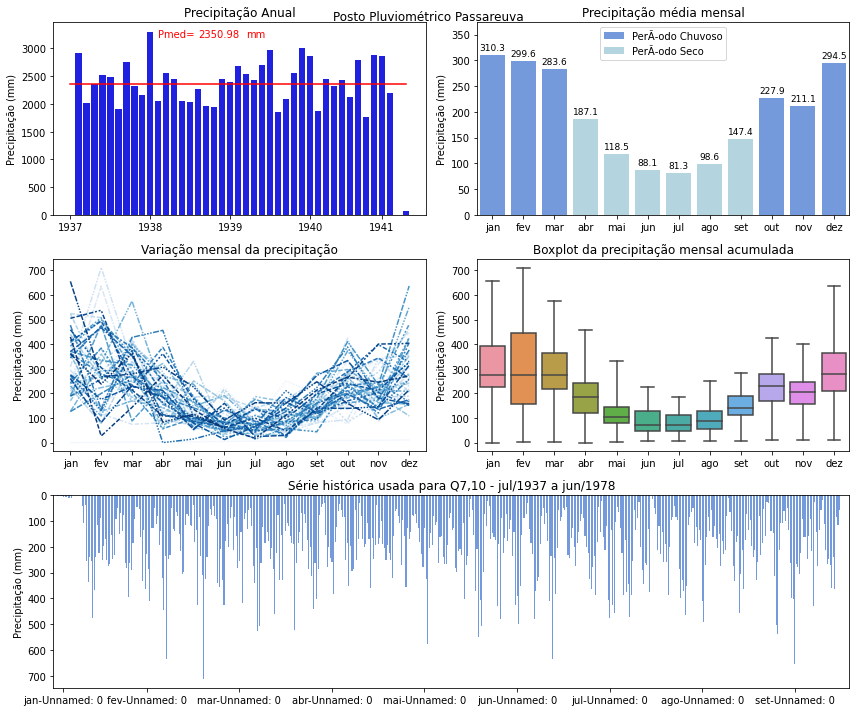

In [61]:
chuva=pd.read_csv('/content/testechuva2.csv',sep=',',encoding='latin-1')
df=chuva
df1=df
df2=df
df=df.set_index('Meses')

df1=df1.melt(id_vars=['Periodo','Meses',],value_name ='Precipitação',var_name ='Ano')
df1=df1.set_index('Ano')
plt.figure(figsize=(12,10))
plt.suptitle("Posto Pluviométrico Passareuva",y=0.98)
A=plt.subplot(3,2,1)
plt.title('Precipitação Anual')
df3=df1.reset_index()
df3=df3.groupby('Ano')['Precipitação'].agg(['sum','count'])

#considerando apenas os anos completos para apresentação e cálculo da P médial anual
df3['sum'] = np.where(df3['count'] < 12, np.nan, df3['sum'])
print(df3.head())
#df3=df1.groupby(by=['Ano']).sum()
df3=df3.reset_index()



o=sns.barplot(data=df3,x='Ano',y='sum',color='Blue')
plt.xticks(ticks=[0,10,20,30,39])
df3['Média']=df3['sum'].mean()
df3['Média'].plot(color='red')
x=df3['Média'].mean()
xx=11
plt.text(xx,3200,'Pmed=',color='red')
plt.text(xx+5,3200,round(x,2),color='red')
plt.text(xx+11,3200,'mm',color='red')
plt.ylabel('Precipitação (mm)')


plt.xlabel('')
B=plt.subplot(3,2,2)

o=sns.barplot(data=df1,x='Meses',y='Precipitação',hue='Periodo',dodge=False,
              n_boot=1,palette=["cornflowerblue", "lightblue"])
#o.get_legend().remove()
o.legend().set_title('')
plt.legend(loc='upper center')
plt.ylabel('Precipitação (mm)')
def add_value_labels(ax, spacing=2.5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in o.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,fontsize=9,rotation=0)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(o)
    
#plt.ylim([0,df1['Precipitação'].groupby(by='Meses').max()+30])
plt.title('Precipitação média mensal')
plt.xlabel('')

C=plt.subplot(3,2,3)
f=sns.lineplot(data=df,legend=False,palette='Blues')
plt.ylabel('Precipitação (mm)')
plt.title('Variação mensal da precipitação')
plt.xlabel('')
D=plt.subplot(3,2,4)
l=sns.boxplot(data=df1,x='Meses',y='Precipitação',whis=[0,100])
plt.ylabel('Precipitação (mm)')
plt.xlabel('')
plt.title('Boxplot da precipitação mensal acumulada')


E=plt.subplot(3,1,3)
"""
E=plt.subplot(3,2,5)
g=sns.lineplot(data=df1,x='Ano',y='Precipitação',legend=False)
plt.xticks(ticks=[0,10,20,30,40])
plt.xlabel('')
"""
#F=plt.subplot(3,2,6)
plt.title('Série histórica usada para Q7,10 - jul/1937 a jun/1978',)
df2=df2.drop('Periodo',1)
df2=df2.melt(id_vars=['Meses'],value_name ='Precipitação',var_name ='Ano')
df2['concat']=df2['Meses']+'-'+df2['Ano']
g=sns.barplot(data=df2,x='concat',y='Precipitação',color='cornflowerblue')
def change_width(g, new_value) :
    for patch in g.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * 1)

change_width(g, 0.7)
g.invert_yaxis()
#plt.ylim([700,0])
plt.ylabel('Precipitação (mm)')
plt.xticks(ticks=[6,60,120,180,240,300,360,420,480],rotation=0)
plt.xlabel('')
df2.to_csv('df2.csv')

plt.tight_layout()
plt.savefig('SalesCruz.jpg',dpi=200)